# Portfolion Project 1: Regression

#### **Task**
Predict the age of abalone from physical measuremnets only
#### **Problem**
The manual process of determining the age of an abalone can be a tedious and time-comsuming process. It involves cutting the shell through the cone, staining it, \
and counting the number of rings through a microscope

#### __Solution__
Create a machine learning algorithm to predict the age of an abalone from physical measurments only
## Dataset Information
- 8 features
- 4177 instances


`Sex`: Categorical - M, F, and I (infant)

`Length`: Continuous - Longest shell measurement (in mm)

`Diameter`: Continuous - measurement perpendicular to length (in mm)

`Height`: Continuous - with meat in shell (in mm) 

`Whole_weight`:	Continuous - whole abalone (in grams) 

`Shucked_weight`: Continuous - weight of meat (in grams) 

`Viscera_weight`: Continuous - gut weight after bleeding (in grams) 

`Shell_weight`: Continuous - after being dried (in grams) 

`Rings`: Integer - +1.5 gives the age in years (Target variable)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

import lightgbm as lgb

import pickle

%matplotlib inline

In [2]:
path = r"C:\Users\USER\Desktop\Dataset\Project\Abalone Project\abalone.data"

In [3]:
df = pd.read_csv(path, header=None, index_col=False)
df.columns = [
    'sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'
    ]

df.head()

sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

## Exploratory Data Analysis (EDA)

In [4]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

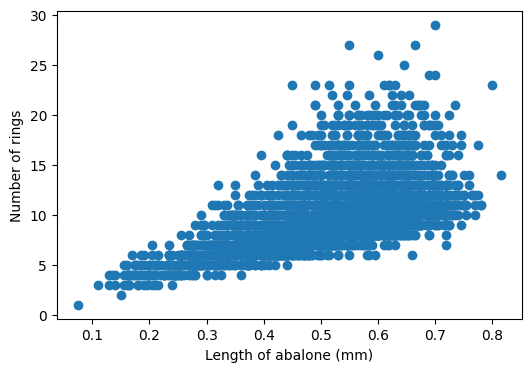

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(df['length'], df['rings'])
plt.xlabel('Length of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

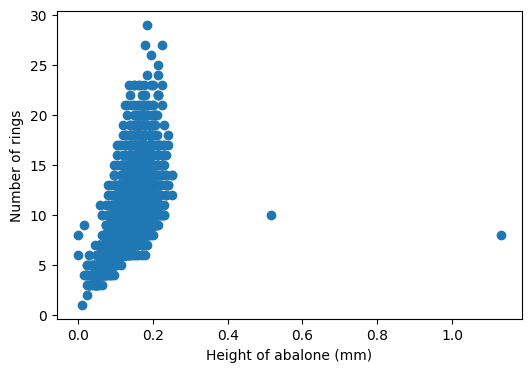

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(df['height'], df['rings'])
plt.xlabel('Height of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

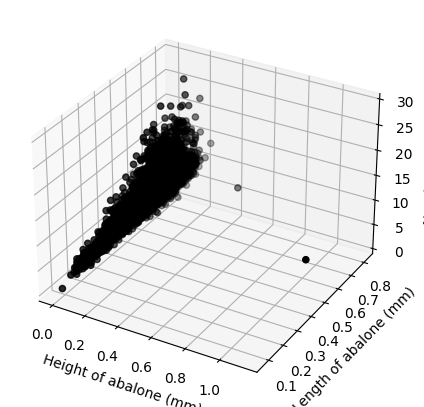

In [7]:
fig = plt.figure(figsize=(5,20))
ax = plt.axes(projection='3d')

ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.set_zlabel('Number of rings')

ax.scatter3D(df['height'], df['length'], df['rings'], c='black')
plt.show()

## Feature Engineering
### On-hot encoding

In [8]:
enc_df = pd.get_dummies(df, dtype='int')
enc_df.head()

length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  sex_F  sex_I  sex_M  
0         0.150     15      0      0      1  
1         0.070      7      0      0      1  
2         0.210      9      1      0      0  
3         0.155     10      0      0      1  
4         0.055      7      0      1      0

### Modelling

In [9]:
train_set = enc_df.iloc[:4099,:]
valid_set = enc_df.iloc[4099:,:]

### Baseline model: Multiple Linear Regression

In [10]:
X = train_set[['length', 'height']]
y = train_set['rings'].values.reshape(-1,1)

X_val = valid_set[['length', 'height']]
y_val = valid_set['rings'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

# Test RMSE

lin_reg_pred = lin_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

#Validtion RMSE
lin_reg_pred_val = lin_reg.predict(X_val)
lin_val_rmse = mean_squared_error(y_val, lin_reg_pred_val, squared=False)
print(f'Val RMSE: {lin_val_rmse}')

Test RMSE: 2.5679099174951547
Val RMSE: 1.566178378231163


### Multiple Linear Regression with regularization (ridge regression)

In [13]:
ridge = Ridge(random_state=42)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

#ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_root_mean_squared_error', cv=5)
#ridge_regressor.fit(X_train, y_train)

ridge_regressor = pickle.load(open('ridge_regressor.pkl', 'rb'))

print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 1}
2.6564563658448885


In [15]:
ridge_reg = Ridge(alpha=1)

#ridge_reg.fit(X_train, y_train)
ridge_reg = pickle.load(open('ridge_reg.pkl', 'rb'))

ridge_reg_pred = ridge_reg.predict(X_test)

# Test RMSE
test_rmse = mean_squared_error(y_test, ridge_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

#Validtion RMSE
ridge_reg_pred_val = ridge_reg.predict(X_val)
ridge_val_rmse = mean_squared_error(y_val, ridge_reg_pred_val, squared=False)
print(f'Val RMSE: {ridge_val_rmse}')

Test RMSE: 2.5871300097108296
Val RMSE: 1.5640813253014882


### Multiple Linear Regression with regularization (lasso regression)

In [16]:
lasso = Lasso(tol=0.05, random_state=42)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

#lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_root_mean_squared_error', cv=5)
#lasso_regressor.fit(X_train, y_train)

lasso_regressor = pickle.load(open('lasso_regressor.pkl', 'rb'))

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 0.01}
2.6677284549480764


In [17]:
lasso_reg = Lasso(alpha=0.01)

#lasso_reg.fit(X_train, y_train)
lasso_reg = pickle.load(open('lasso_reg.pkl', 'rb'))

lasso_reg_pred = lasso_reg.predict(X_test)

# Test RMSE
test_rmse = mean_squared_error(y_test, lasso_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

#Validtion RMSE
lasso_reg_pred_val = lasso_reg.predict(X_val)
lasso_val_rmse = mean_squared_error(y_val, lasso_reg_pred_val, squared=False)
print(f'Val RMSE: {lasso_val_rmse}')

Test RMSE: 2.610473125813745
Val RMSE: 1.5563831232308802


### Tree-based models

In [18]:
X = train_set.drop(columns=['rings','diameter','whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight'], axis=1)
y = train_set['rings'].values.reshape(-1,1)

X_val = valid_set.drop(columns=['rings','diameter','whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight'], axis=1)
y_val = valid_set['rings'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### Random forest

In [19]:
rf = RandomForestRegressor(random_state=42)

parameters = {'n_estimators': [int(x) for x in np.linspace(100, 1000, 10)]}

#rf_regressor = GridSearchCV(rf, parameters, scoring='neg_root_mean_squared_error', cv=5)
#rf_regressor.fit(X_train, y_train.ravel());

rf_regressor = pickle.load(open('rf_regressor.pkl', 'rb'))

print(rf_regressor.best_params_)
print(-rf_regressor.best_score_)

{'n_estimators': 800}
2.895031024686208


In [20]:
rf_reg = RandomForestRegressor(n_estimators=800)

#rf_reg.fit(X_train, y_train.ravel())
rf_reg = pickle.load(open('rf_reg.pkl', 'rb'))

rf_reg_pred = rf_reg.predict(X_test)

# Test RMSE
test_rmse = mean_squared_error(y_test, rf_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

#Validtion RMSE
rf_reg_pred_val = rf_reg.predict(X_val)
rf_val_rmse = mean_squared_error(y_val, rf_reg_pred_val, squared=False)
print(f'Val RMSE: {rf_val_rmse}')

Test RMSE: 2.6428409961989203
Val RMSE: 2.2405169437271932


#### Bagging

In [21]:
bg = BaggingRegressor(random_state=42)

parameters = {'n_estimators': [int(x) for x in np.linspace(10, 1000, 10)],
              'max_samples': [float(x) for x in np.arange(0.1, 1.1, 0.1)]}

#bg_regressor = GridSearchCV(bg, parameters, scoring='neg_root_mean_squared_error', cv=5)
#

bg_regressor = pickle.load(open('bg_regressor.pkl', 'rb'))

print(bg_regressor.best_params_)
print(-bg_regressor.best_score_)

{'max_samples': 0.1, 'n_estimators': 340}
2.5621086800746644


In [22]:
bg_reg = BaggingRegressor(n_estimators=340, max_samples=0.1)

#bg_reg.fit(X_train, y_train.ravel())
bg_reg = pickle.load(open('bg_reg.pkl', 'rb'))

bg_reg_pred = bg_reg.predict(X_test)

# Test RMSE
test_rmse = mean_squared_error(y_test, bg_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

#Validtion RMSE
bg_reg_pred_val = bg_reg.predict(X_val)
bg_val_rmse = mean_squared_error(y_val, bg_reg_pred_val, squared=False)
print(f'Val RMSE: {bg_val_rmse}')

Test RMSE: 2.4274786891726303
Val RMSE: 1.7578969512620948


#### Pickle models

In [23]:
with open('bg_regressor.pkl', 'wb') as f:
    pickle.dump(bg_regressor, f)

pickle.dump(bg_reg, open('bg_reg.pkl', 'wb'))

with open('rf_regressor.pkl', 'wb') as f:
    pickle.dump(rf_regressor, f)

pickle.dump(rf_reg, open('rf_reg.pkl', 'wb'))

with open('lasso_regressor.pkl', 'wb') as f:
    pickle.dump(lasso_regressor, f)

pickle.dump(lasso_reg, open('lasso_reg.pkl', 'wb'))

with open('ridge_regressor.pkl', 'wb') as f:
    pickle.dump(ridge_regressor, f)

pickle.dump(ridge_reg, open('ridge_reg.pkl', 'wb'))


#### LightGBM

In [24]:
params = {'learning_rate': '0.01'}

train_data = lgb.Dataset(X_train.values, label = y_train.ravel())

In [26]:
lgb_reg = lgb.train(params, train_data, 100)

lgb_reg_pred = lgb_reg.predict(X_test)

# Test RMSE
test_rmse = mean_squared_error(y_test, lgb_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

#Validtion RMSE
lgb_reg_pred_val = lgb_reg.predict(X_val)
lgb_val_rmse = mean_squared_error(y_val, lgb_reg_pred_val, squared=False)
print(f'Val RMSE: {lgb_val_rmse}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 3689, number of used features: 5
[LightGBM] [Info] Start training from score 9.955001
Test RMSE: 2.5516374432050553
Val RMSE: 1.5097310114966809


### Select best model

In [31]:
best_model = pd.DataFrame({'Model':['Random Forest Regressor', 'Bagging Regressor', 'Linear Regressor', 'LightGBM', 'Lasso Regressor', 'Ridge Regressor'],
                           'RMSE':[rf_val_rmse, bg_val_rmse, lin_val_rmse, lgb_val_rmse, lasso_val_rmse, ridge_val_rmse]})

best_model.sort_values(by='RMSE', ascending=True, inplace=True)

best_model

Model      RMSE
3                 LightGBM  1.509731
4          Lasso Regressor  1.556383
5          Ridge Regressor  1.564081
2         Linear Regressor  1.566178
1        Bagging Regressor  1.757897
0  Random Forest Regressor  2.240517